# Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥Î≥¥Ïûê

ARIMAÎ•º ÌÜµÌï¥ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÎäî Ïä§ÌÑ∞ÎîîÎ•º ÏßÑÌñâÌñàÎäîÎç∞ Ïã§Ï†ú Ï£ºÏãùÍ∞í ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥Î≥¥Ïûê. Îç∞Ïù¥ÌÑ∞Îäî [yahoo finance](https://finance.yahoo.com/?guccounter=1) ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÏõêÌïòÎäî Ï¢ÖÎ™©ÏùÑ Í≤ÄÏÉâ ÌõÑ historical dataÎ•º Îì§Ïñ¥Í∞ÄÎ©¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î∞õÏùÑ Ïàò ÏûàÎã§. Ï≤òÏùåÏùÄ __ÏÇºÏÑ±Ï†ÑÏûêÎ°ú__ ÏßÑÌñâÌï¥Î≥¥Ïûê.

# 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

df.head()

Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2021-02-17  83900.0  84200.0  83000.0  83200.0  81707.648438  18307735
2021-02-18  83200.0  83600.0  82100.0  82100.0  80627.382813  21327683
2021-02-19  82300.0  82800.0  81000.0  82600.0  81118.414063  25880879
2021-02-22  83800.0  84200.0  82200.0  82200.0  80725.593750  25419886
2021-02-23  81200.0  82900.0  81100.0  82000.0  80529.179688  20587314

Open(ÏãúÏûëÍ∞Ä), High(ÏµúÍ≥†Í∞Ä), Low(ÏµúÏ†ÄÍ∞Ä), Close(Ï¢ÖÍ∞Ä), Adj Close(ÏàòÏ†ïÏ¢ÖÍ∞Ä), Volume(Í±∞ÎûòÎüâ)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ÏûàÎã§. Ï¢ÖÍ∞ÄÎßå Í∞ñÍ≥† Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌï¥Î≥¥Ïûê.

In [2]:
ts = df['Close']
ts.head()

Date
2021-02-17    83200.0
2021-02-18    82100.0
2021-02-19    82600.0
2021-02-22    82200.0
2021-02-23    82000.0
Name: Close, dtype: float64

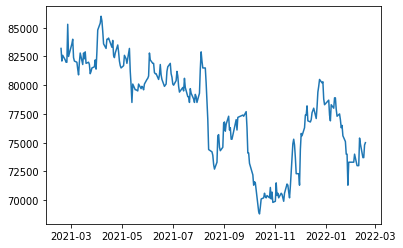

In [3]:
plt.plot(ts)

# 2. Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

### 2-1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [4]:
print(ts[ts.isna()])

Series([], Name: Close, dtype: float64)


In [5]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏñ¥ÏÑú Î≥¥Í∞ÑÏùÄ Ìå®Ïä§ÌñàÎã§.
# ts = ts.interpolate(method='time')
# ts[ts.isna()]

### 2-2. Î°úÍ∑∏ Î≥ÄÌôò

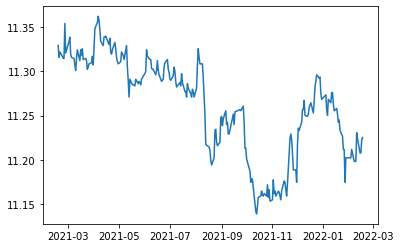

In [6]:
ts_log = np.log(ts)
plt.plot(ts_log)

# 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

### 3-1. Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù, Ï†ïÎüâÏ†Å ADF test, ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥

In [7]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ∞ÅÌôî
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [8]:
#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìú Ìò∏Ï∂ú
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

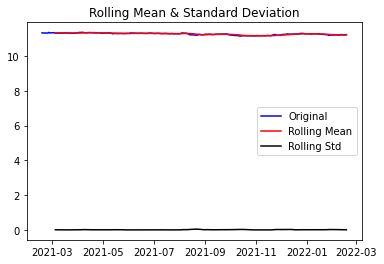

Results of Dickey-Fuller Test:
Test Statistic                  -1.889188
p-value                          0.337164
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


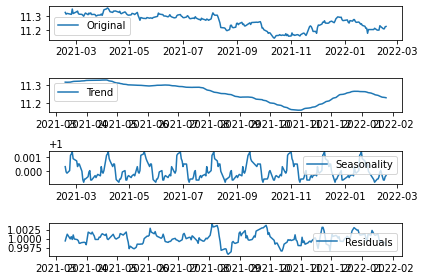

In [9]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 28) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.852252e+00
p-value                        3.566701e-07
#Lags Used                     5.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


p-value Í∞íÏù¥ ÎÇÆÍ≤å ÎÇòÏôÄÏïº ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏÑ±ÏûàÎã§Í≥† ÎßêÌï† Ïàò ÏûàÎã§.   
`3.566701*10^-7 = 0.0000003566701`ÏúºÎ°ú ÏßÑÌñâÌñàÎã§.

# 4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

ÌïôÏäµ 9, ÌÖåÏä§Ìä∏1 ÎπÑÏú®Î°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÏûê

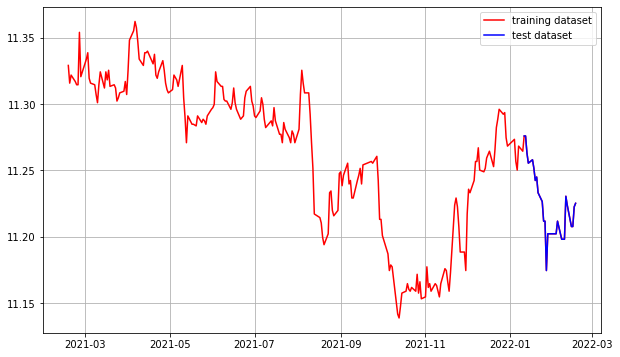

In [11]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# 5. Ï†ÅÏ†ï ARIMA ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


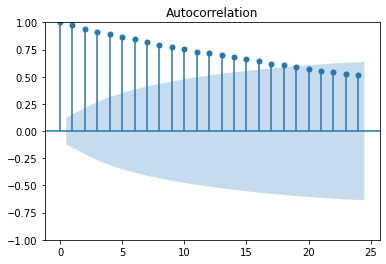

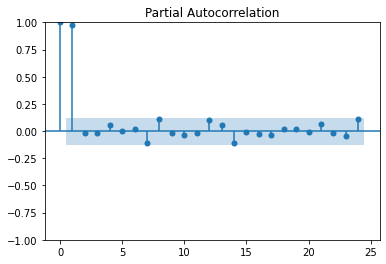

In [12]:
plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.535769e+01
p-value                        3.647987e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


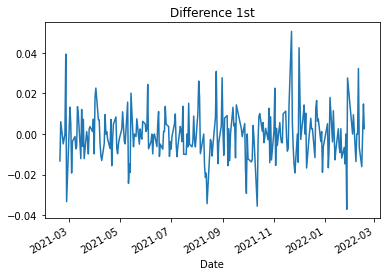

In [13]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.293282e+00
p-value                        4.205271e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


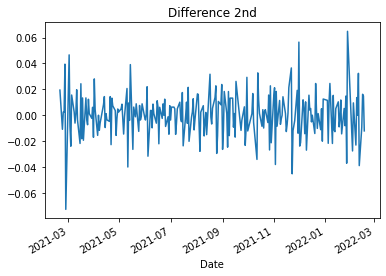

In [14]:
# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

2Ï∞® Ï∞®Î∂ÑÎ≥¥Îã§ 1Ï∞® Ï∞®Î∂ÑÏùò p-value Í∞íÏù¥ ÏïàÏ†ïÏ†ÅÏù¥Í≤å ÎÇòÏôîÎã§.

### ARIMA Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ p, q, d   
ARIMA Î™®Îç∏Ïóê 3Í∞ÄÏßÄÏùò ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏûàÎäîÎç∞ Ïûò Ï†ïÌï¥Ïïº Ïò¨Î∞îÎ•∏ ÏòàÏ∏°ÏùÑ Íµ¨Ìï† Ïàò ÏûàÎã§.   
- p: ARÏùò ÏãúÏ∞®
- d: I ÌöüÏàò
- q: MAÏùò ÏãúÏ∞®   

ARIMAÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî `(p, d, q)` ÏàúÏÑúÎã§.   
pÏôÄ qÎäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú p + q < 2, P * q = 0Ïù∏ Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÎäîÎç∞ ÎëòÏ§ë ÌïòÎÇòÎäî 0Ïù¥ÎùºÎäî ÎúªÏù¥Îã§. ÏôúÎÉêÌïòÎ©¥ ÎßéÏùÄ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ARÏù¥ÎÇò MAÏ§ë ÌïòÎÇòÏùò Í≤ΩÌñ•Îßå Í∞ñÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. Í∑∏Î†áÎã§Î©¥ Ïù¥Îì§ÏùÄ Ïñ¥ÎñªÍ≤å Í≤∞Ï†ïÎê†Íπå? ÎåÄÌëúÏ†ÅÏúºÎ°ú ACF(Autocorrelation Function), PACF(Partial Autocorrelation Function)Í∞Ä ÏûàÎã§.

- ACF ÏãúÏ∞®(lag)Ïóê Îî∞Î•∏ Í¥ÄÏ∏°ÏπòÎì§ ÏÇ¨Ïù¥Ïùò Í¥ÄÎ†®ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎäî Ìï®Ïàò, Ï£ºÏñ¥ÏßÑ ÏãúÍ≥ÑÏó¥Ïùò ÌòÑÏû¨ Í∞íÏù¥ Í≥ºÍ±∞Í∞íÍ≥º Ïñ¥ÎñªÍ≤å ÏÉÅÍ¥ÄÎêòÎäîÏßÄ ÏÑ§Î™ÖÌïúÎã§. ACFÏùò plotÏóêÏÑú XÏ∂ïÏùÄ ÏÉÅÍ¥Ä Í≥ÑÏàò, yÏ∂ïÏùÄ ÏãúÏ∞® ÏàòÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
- PACF Îã§Î•∏ Í¥ÄÏ∏°ÏπòÏùò ÏòÅÌñ•Î†•ÏùÑ Î∞∞Ï†úÌïòÍ≥† Îëê ÏãúÏ∞®Ïùò Í¥ÄÏ∏°Ïπò Í∞Ñ Í¥ÄÎ†®ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎäî Ìï®Ïàò, k Ïù¥Ïô∏Ïùò Î™®Îì† ÏãúÏ∞®Î•º Í∞ñÎäî Í¥ÄÏ∏°ÏπòÏùò ÏòÅÌñ•Î†•ÏùÑ Î∞∞Ï†úÌïú Í∞ÄÏö¥Îç∞ ÌäπÏ†ï Îëê Í¥ÄÏ∏°ÏßÄ,  ùëåùë° ÏôÄ  ùëåùë°‚àíùëò Í∞Ä ÏñºÎßàÎÇò Í¥ÄÎ†®Ïù¥ ÏûàÎäîÏßÄ ÎÇòÌÉÄÎÇ∏Îã§.

# 6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

### 6-1. ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [15]:
# Build Model
model = ARIMA(train_data, order=(2, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  223
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 667.256
Date:                Thu, 17 Feb 2022   AIC                          -1328.513
Time:                        11:49:22   BIC                          -1318.304
Sample:                             0   HQIC                         -1324.391
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0581      0.055      1.047      0.295      -0.051       0.167
ar.L2         -0.0459      0.077     -0.600      0.548      -0.196       0.104
sigma2         0.0001   9.47e-06     15.152      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


### 6-2. Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


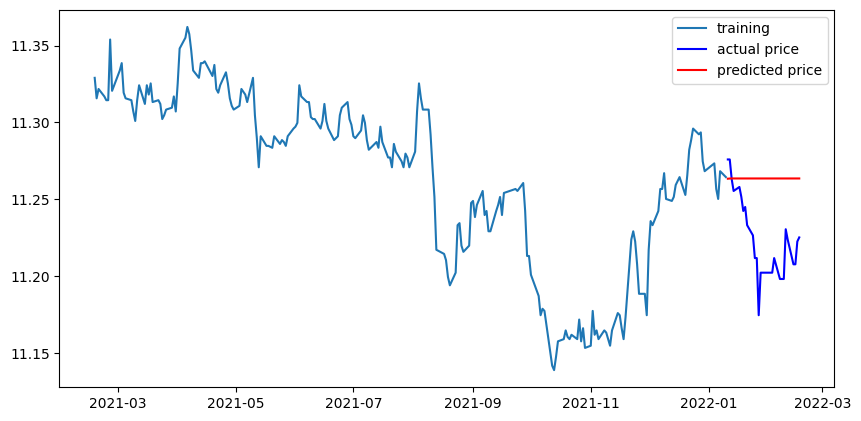

In [16]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

### 6-3. ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [17]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  11898456.59482692
MAE:  2990.6646938696886
RMSE:  3449.4139494741594
MAPE: 4.04%


# 7. Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥Î≥¥Í∏∞

Ïù¥Î≤àÏóêÎäî __Ïï†Ìîå__ Í∑∏Î¶¨Í≥† __ÌÖåÏä¨Îùº__ Î°ú ÏßÑÌñâÌï¥Î≥¥Ïûê.

# 7-1. Ïï†Ìîå

In [18]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-17  131.250000  132.220001  129.470001  130.839996  130.066940   
2021-02-18  129.199997  130.000000  127.410004  129.710007  128.943619   
2021-02-19  130.240005  130.710007  128.800003  129.869995  129.102676   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.255547   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.116379   

               Volume  
Date                   
2021-02-17   97918500  
2021-02-18   96856700  
2021-02-19   87668800  
2021-02-22  103916400  
2021-02-23  158273000

In [19]:
ts = df['Close']
ts.head()

Date
2021-02-17    130.839996
2021-02-18    129.710007
2021-02-19    129.869995
2021-02-22    126.000000
2021-02-23    125.860001
Name: Close, dtype: float64

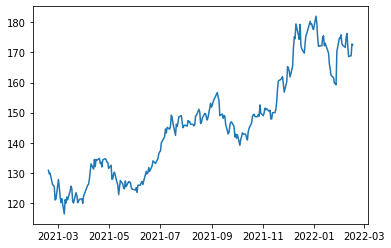

In [20]:
plt.plot(ts)

In [21]:
# Í≤∞Ï∏°Ïπò Ï≤¥ÌÅ¨
print(ts[ts.isna()])

Series([], Name: Close, dtype: float64)


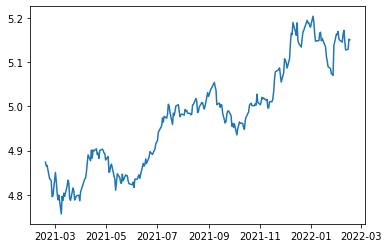

In [22]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)
plt.plot(ts_log)

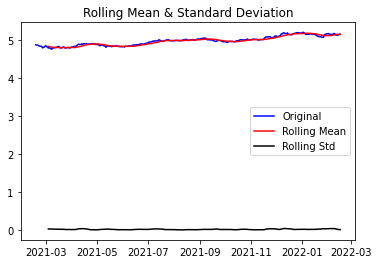

Results of Dickey-Fuller Test:
Test Statistic                  -0.690251
p-value                          0.849259
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


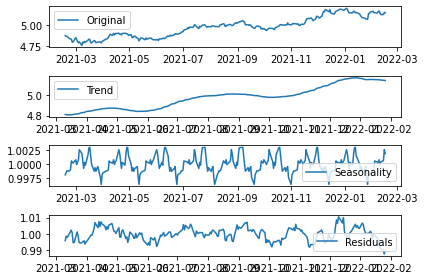

In [23]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [24]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.449081
p-value                          0.000243
#Lags Used                       6.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


p-value `0.000243` ÌôïÏù∏ÌñàÎã§.

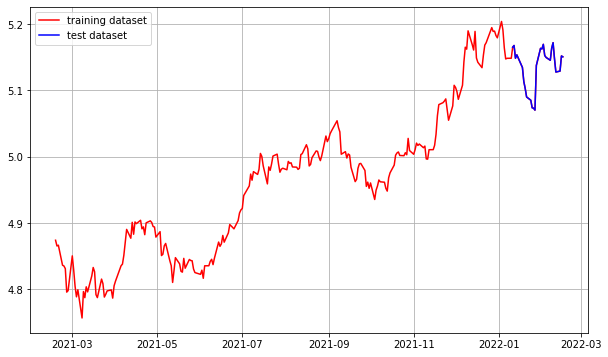

In [25]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


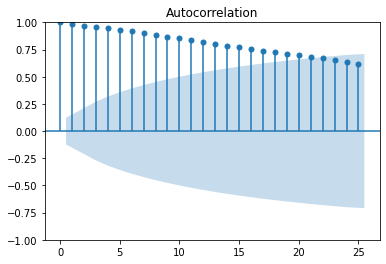

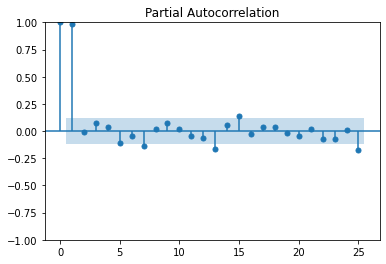

In [26]:
plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.613159e+01
p-value                        4.778989e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


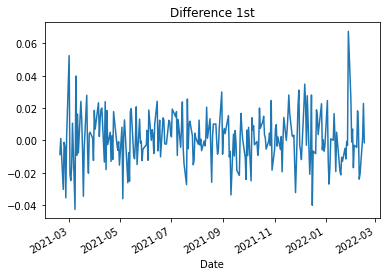

In [27]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.700936e+00
p-value                        1.339935e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


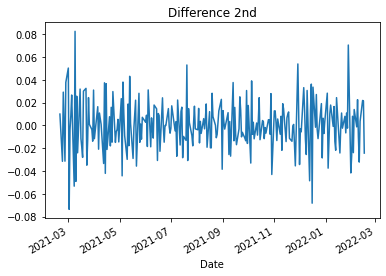

In [28]:
# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

ÏÇºÏÑ±Ï†ÑÏûêÏùò ÏºÄÏù¥Ïä§ÏôÄ ÎèôÏùºÌïòÍ≤å 1Ï∞® ÎØ∏Î∂ÑÏùò `p-value`Í∞íÏù¥ Ï†úÏùº ÏïàÏ†ïÏ†ÅÏù¥Îã§.

### ÏµúÏ¢Ö Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [29]:
# Build Model
model = ARIMA(train_data, order=(2, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 628.439
Date:                Thu, 17 Feb 2022   AIC                          -1250.878
Time:                        11:49:25   BIC                          -1240.603
Sample:                             0   HQIC                         -1246.732
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0657      0.065     -1.014      0.311      -0.193       0.061
ar.L2         -0.0330      0.060     -0.550      0.582      -0.150       0.084
sigma2         0.0002   2.02e-05     11.420      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


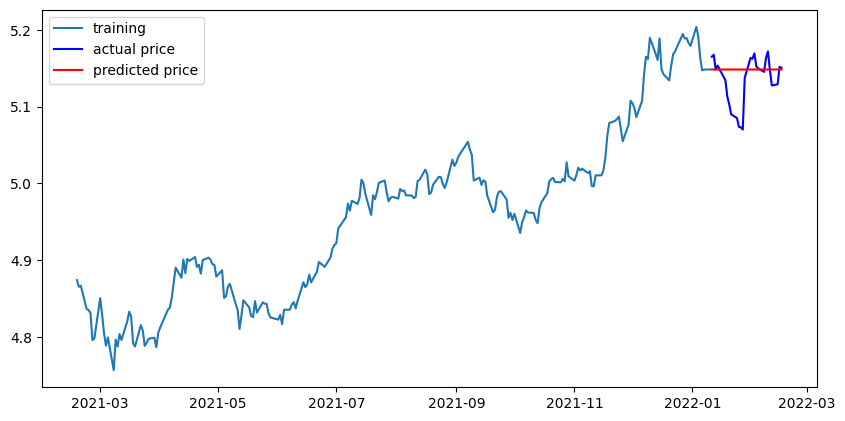

In [30]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [31]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  33.97919466636117
MAE:  4.151931552436404
RMSE:  5.829167579196979
MAPE: 2.51%


`MAPE` 2.51%Î°ú ÏÇºÏÑ±Ï†ÑÏûêÎ≥¥Îã§ ÎÇÆÍ≤å ÎÇòÏôîÎã§.

# 7-2. ÌÖåÏä¨Îùº

In [32]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-17  779.090027  799.840027  762.010010  798.150024  798.150024   
2021-02-18  780.900024  794.690002  776.270020  787.380005  787.380005   
2021-02-19  795.000000  796.789978  777.369995  781.299988  781.299988   
2021-02-22  762.640015  768.500000  710.200012  714.500000  714.500000   
2021-02-23  662.130005  713.609985  619.000000  698.840027  698.840027   

              Volume  
Date                  
2021-02-17  25996500  
2021-02-18  17957100  
2021-02-19  18958300  
2021-02-22  37269700  
2021-02-23  66606900

In [33]:
ts = df['Close']
ts.head()

Date
2021-02-17    798.150024
2021-02-18    787.380005
2021-02-19    781.299988
2021-02-22    714.500000
2021-02-23    698.840027
Name: Close, dtype: float64

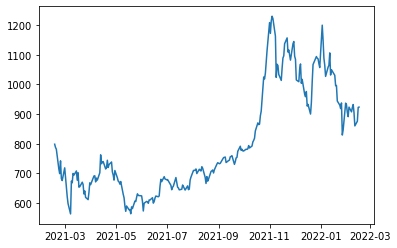

In [34]:
plt.plot(ts)

In [35]:
# Í≤∞Ï∏°Ïπò Ï≤¥ÌÅ¨
print(ts[ts.isna()])

Series([], Name: Close, dtype: float64)


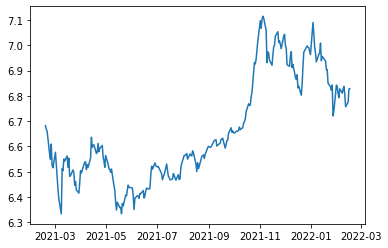

In [36]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)
plt.plot(ts_log)

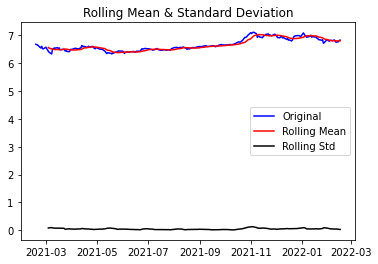

Results of Dickey-Fuller Test:
Test Statistic                  -1.253137
p-value                          0.650330
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


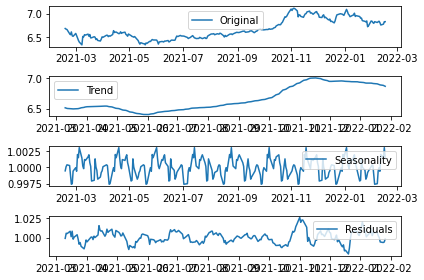

In [37]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [38]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.567501e+00
p-value                        8.089813e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


p-value `8.089813e-09` ÏóÑÏ≤≠ ÎÇÆÍ≤å ÎÇòÏôÄ ÏïàÏ†ïÏ†ÅÏù∏Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§.

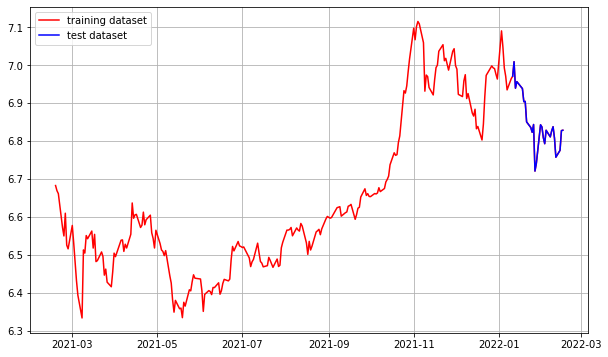

In [39]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


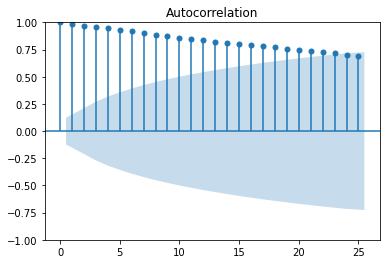

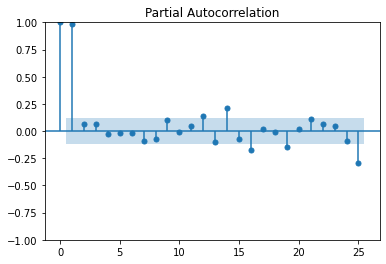

In [40]:
plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.683248e+01
p-value                        1.155026e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


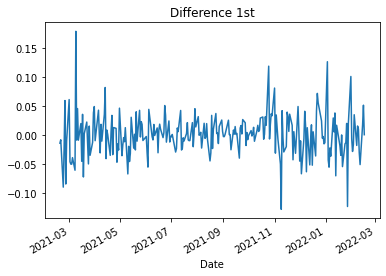

In [41]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.198159e+00
p-value                        2.404162e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


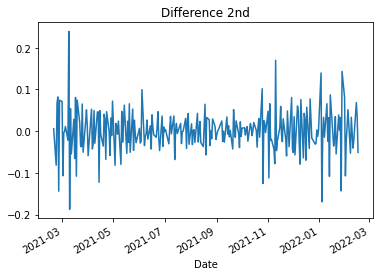

In [42]:
# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

ÏÇºÏÑ±Ï†ÑÏûê, Ïï†ÌîåÍ≥º ÎèôÏùºÌïòÍ≤å 1Ï∞® ÎØ∏Î∂ÑÏùò `p-value`Í∞íÏù¥ Ï†úÏùº ÏïàÏ†ïÏ†ÅÏù¥Îã§.

### ÏµúÏ¢Ö Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [43]:
# Build Model
model = ARIMA(train_data, order=(2, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 439.085
Date:                Thu, 17 Feb 2022   AIC                           -872.171
Time:                        11:49:27   BIC                           -861.896
Sample:                             0   HQIC                          -868.025
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0525      0.063     -0.834      0.404      -0.176       0.071
ar.L2          0.0152      0.061      0.251      0.802      -0.104       0.134
sigma2         0.0012   6.97e-05     17.554      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


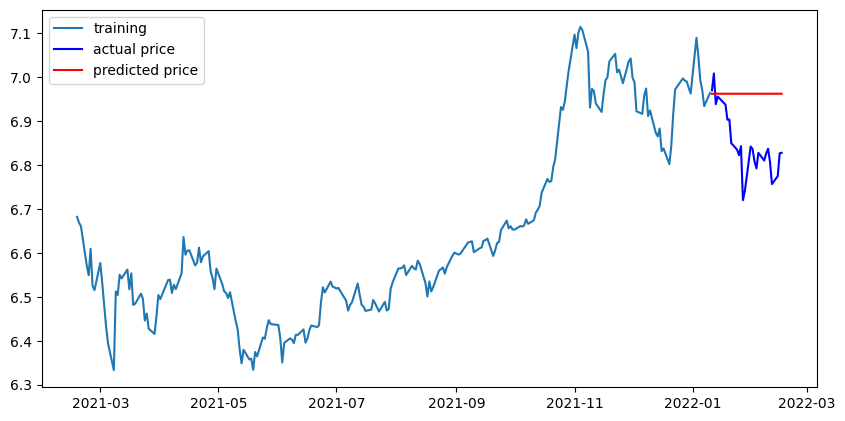

In [44]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [45]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  17397.566520072498
MAE:  118.00342657593494
RMSE:  131.89983517833713
MAPE: 13.00%


# Ï¥ù Ï†ïÎ¶¨

- ÏÇºÏÑ±Ï†ÑÏûê: MAPE: 4.04%, 1Ï∞® Ï∞®Î∂ÑÍ∞í = 3.647987e-28
- Ïï†Ìîå: MAPE: 2.51%, 1Ï∞® Ï∞®Î∂ÑÍ∞í = 4.778989e-29
- ÌÖåÏä¨Îùº: MAPE: 13.00%, 1Ï∞® Ï∞®Î∂ÑÍ∞í = 1.155026e-29

ÌÖåÏä¨ÎùºÎäî Ïù¥Î≤àÏóê Ï†úÏûëÌïú Î™®Îç∏Ïù¥ Í∏âÎùΩÏùÑ Ï†úÎåÄÎ°ú Î∞òÏòÅÏùÑ Î™ªÌï¥ÏÑú Í∑∏Îü∞ÏßÄ Î™∞ÎùºÎèÑ Îã§Î•∏Í±∞ÏôÄ ÎπÑÍµêÌïòÎ©¥ ÎßéÏù¥ ÏïàÎßûÍ≤å ÎÇòÏôîÎã§. Í∑∏Î¶¨Í≥† ÏòàÏ∏° Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî Ìïú Í≥ºÏ†ïÏóêÏÑú predicted priceÎ•º Î≥¥Î©¥ trainÏùò ÎßàÏßÄÎßâ Í∞ÄÍ≤© Í∑∏ÎåÄÎ°ú ÏùºÏûêÎ°ú ÏòàÏ∏°ÌïòÍ≥† ÏûàÎã§. Íµ¨Ï∂ïÌï† Îïå Ïù∏ÏßÄÌïòÏßÄ Î™ªÌïú ÌÅ∞ Ïã§ÏàòÎ•º ÌïúÍ±∞Í∞ôÎã§. Í∑∏ÎûòÏÑú Í≤∞Í≥ºÎßå ÎëêÍ≥† Î≥¥ÏûêÎ©¥ Îß§Ïö∞ ÏïÑÏâΩÍ≥† Ïã§Ìå®Ìïú ÌîÑÎ°úÏ†ùÌä∏ÎùºÍ≥† ÏÉùÍ∞ÅÌïúÎã§.

# ÌöåÍ≥†

Ï≤òÏùåÏóê Ï£ºÏãùÏùÑ ÏòàÏ∏°ÌïúÎã§Í≥† ÌñàÏùÑ Îïå Ìà¨ÏûêÎèÑ ÏßÅÏ†ë ÎßéÏù¥ Ìï¥Î≥∏ ÏûÖÏû•ÏúºÎ°úÏç® ÎßéÏù¥ ÏÑ§Î†úÎã§. Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§Î©¥ Ïó∞Íµ¨Ìïú Î™®Îç∏ÏùÑ Ìà¨Ïûê Ï∞∏Í≥†Ïö©ÏúºÎ°ú ÌôúÏö©ÌïòÎ©¥ Ï¢ãÍ≤†Îã§Í≥† ÏÉùÍ∞ÅÌñàÎã§. ÌïòÏßÄÎßå ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îßå Ïù¥Ïö©Ìï¥ÏÑú Ï£ºÏãùÏùÑ ÏòàÏ∏°ÌïòÍ∏∞Îäî ÎÑàÎ¨¥ Ïñ¥Î†§Ïõ†Í≥†, ÏòàÏ∏°ÌïòÍ≥† Ï∂îÏ∏°ÌïòÎäî Î∞©ÏãùÏù¥ ÎÇ¥Í∞Ä ÏÉÅÏÉÅÌïúÍ≤ÉÍ≥ºÎäî ÎßéÏù¥ Îã¨ÎûêÎã§.   
- ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Îïå Îã§Î•∏ Ï†ïÎ≥¥Î•º ÌôúÏö©ÌïòÎ©¥ ÏïàÎêúÎã§Îäî Ï†êÏù¥ Îß§Ïö∞ ÏïÑÏâ¨Ïõ†Îã§.   
Ïä§ÌÑ∞ÎîîÌïòÎ©¥ÏÑú ÎÇòÏò® ÎÇ¥Ïö©Ïù∏Îç∞, Ïú†Í∞ÄÏùò Î≥ÄÎèô Îç∞Ïù¥ÌÑ∞Îßå ÌôúÏö©ÌïòÎ©¥ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°Ïù¥Îùº ÌïúÎã§. ÌïòÏßÄÎßå ÏúÑÏÑ± ÏÇ¨ÏßÑÍ∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎ©¥ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°Ïù¥ ÏïÑÎãàÎùºÍ≥† ÌïúÎã§. Í∑∏Î†áÎã§Î©¥ __Ï≤òÏùåÎ∂ÄÌÑ∞ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ï£ºÏãù ÏòàÏ∏° Î™®Îç∏Ïóê ÏÇ¨Ïö©ÌïúÍ≤å ÏûòÎ™ªÎêúÍ±∞ ÏïÑÎãêÍπå?__ ÏôúÎÉêÌïòÎ©¥ Îã§ÏñëÌïú ÏÑπÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Ï†ïÎ≥¥ ÎòêÌïú ÎßéÏù¥ ÏûàÍ≥†(ÏòàÎ•ºÎì§Ïñ¥ ÏûêÎèôÏ∞®Îäî Ï≤†Í∞ïÏóÖÍ≥º Ïó∞Í¥ÄÎêòÏñ¥ÏûàÍ≥†, Ïú†Í∞ÄÎäî Î™®Îì† ÏÇ∞ÏóÖÏóê ÏòÅÌñ•ÏùÑ ÎßéÏù¥ ÎØ∏ÏπòÏßÄÎßå ÌäπÌûà ÌôîÌïôÏóÖÏ¢ÖÍ≥º Í¥ÄÎ†®ÎêòÏñ¥ÏûàÎã§. Í∑∏Î¶¨Í≥† ÏµúÍ∑ºÏóê ÎßéÏù¥ Ïù¥ÏäàÎêòÎäî ÏπúÌôòÍ≤ΩÏùÄ Ï†ïÏπòÏôÄ ÌÅ¨Í≤å Í¥ÄÎ†®ÏûàÎã§.), Í∞úÏù∏Ï†ÅÏúºÎ°ú Ï£ºÏãùÏùÄ ÏÇ¨ÎûåÎì§Ïùò Ïã¨Î¶¨Ïóê Í∞ÄÏû• ÌÅ¨Í≤å Ï¢åÏßÄÏö∞ÏßÄÌïúÎã§Í≥† ÏÉùÍ∞ÅÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. ~~RNN Î™®Îç∏ÎßÅ Î∞©Î≤ïÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ ÌåêÎ≥ÑÌïòÎäî Î™®Îç∏ ÎßåÎì† ÎäêÎÇå? -> ÌòπÏãúÎÇòÌï¥ÏÑú Ï∞æÏïÑÎ≥¥Îãà RNNÏúºÎ°ú MNIST Î∂ÑÎ•òÎ•º Íµ¨ÌòÑÌñàÎã§.. -> ÎÇ¥Í∞Ä ÌëúÌòÑÌïòÍ≥† Ïã∂ÏùÄÍ±¥ NLPÏóê ÌäπÌôîÎêú Î™®Îç∏Î°ú CVÎ•º Ìï¥Í≤∞ÌïòÎ†§Í≥† Ïï†Ïì∞Îäî Î™®Ïäµ Í∞ôÏïòÎã§. Ï≤òÏùåÎ∂ÄÌÑ∞ CVÏóê ÌäπÌôîÎêú Î™®Îç∏ÏùÑ Ïì∞Î©¥ ÎêòÎäîÎç∞..~~ Í∑∏ÎûòÏÑú Ïù¥Îü¨Ìïú Î∂ÄÎ∂ÑÏùÑ ÌôúÏö©ÌïòÏßÄ ÏïäÍ≥† ÌÜµÍ≥ÑÌïôÏ†ÅÏù∏ Î∂ÄÎ∂ÑÎßå ÎßéÏù¥ ÌôúÏö©ÌïúÍ≤å ÏïÑÏâ¨Ïõ†Îã§.   


- ÌÜµÍ≥ÑÌïôÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏóê Í∞úÏù∏Ï†ÅÏù∏ Ïù¥Ìï¥ÎèÑÍ∞Ä ÏóÜÏñ¥ÏÑú ÏßÑÌñâÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Îã§.   
Îßê Í∑∏ÎåÄÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ÏùÑ Ïù¥Ìï¥ÌïòÎäî Í≤É Î∂ÄÌÑ∞ Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶ΩÍ∞ÄÏÑ§, p-valueÎ•º Ïù¥Ïö©Ìï¥ Î∂àÏïàÏ†ïÌïú ÏãúÍ≥ÑÏó¥ÏùÑ ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ ÌòïÌÉúÎ°ú Î∞îÍæ∏Îäî Î∞©Î≤ïÍπåÏßÄ Ïù¥Ìï¥ÌïòÎ†§Í≥† ÎÖ∏Î†•ÏùÄ ÌñàÏßÄÎßå ÏôÑÎ≤ΩÌïòÍ≤å Ïù¥Ìï¥ÌïòÍ≥† ÌïôÏäµÌïòÍ∏∞Ïóê Ïñ¥Î†§Ïõ†Îã§. Í∑∏Î¶¨Í≥† Ïò§Îäò ÏßÑÌñâÌïú ÌîÑÎ°úÏ†ùÌä∏ÏôÄ Îã§Î•∏ ÏñòÍ∏∞Ïùº Ïàò ÏûàÏßÄÎßå, Ïù¥Ï†ÑÎ∂ÄÌÑ∞ Îâ¥Ïä§ÎÇò Í∏∞ÏÇ¨Î•º ÌÜµÌï¥ ÌÜµÍ≥ÑÎ•º Ïñ¥Îñ§ Í¥ÄÏ†êÏúºÎ°ú Ïñ¥ÎñªÍ≤å Î≥¥ÎÉêÏóê Îî∞Îùº Í≤∞Í≥ºÎ¨ºÏù¥ ÎßéÏù¥ Îã¨ÎùºÏßÑÎã§Í≥† ÏÉùÍ∞ÅÌñàÍ≥†, Ïù¥Î≤àÏóê ÏßÑÌñâÌïòÎ©¥ÏÑú Ïä§Ïä§Î°ú ÏÉùÍ∞ÅÌïú Í∞ÄÏÑ§Ïù¥ ÎßûÎã§Í≥† ÌôïÏã†ÌñàÎã§. ÏôúÎÉêÌïòÎ©¥ Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Î•º Í∞ñÍ≥†Ïò¨ÏßÄÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥ÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï¥ÌïòÍ≥† ÎÇòÏò® Îç∞Ïù¥ÌÑ∞Î°ú Ïñ¥ÎñªÍ≤å Ìï¥ÏÑùÌïòÎäîÏßÄÏóê Îî∞Îùº Í≤∞Í≥ºÍ∞Ä ÌÅ¨Í≤å Îã¨ÎùºÏßÄÎäîÎç∞, Ïù¥Îïå Ï§ëÎ¶ΩÏ†ÅÏúºÎ°ú ÏÉùÍ∞ÅÌïòÏßÄ ÏïäÏúºÎ©¥ ÌÅ¨Í≤å Ìé∏Ìñ•ÎêòÍ≤å Í≤∞Í≥ºÍ∞Ä ÎÇòÏò®Îã§. Ïù¥Î≤à ÏùµÏä§ÎèÑ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÎäî Ï£ºÏ†úÎ•º ÎëêÍ≥† Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌñàÎäîÎç∞, Îî•Îü¨Îãù Î∂ÑÏïºÏ≤òÎüº ÌÜµÍ≥ÑÌïô Î∂ÑÏïºÎèÑ ÏûòÎ™ª Ìï¥ÏÑùÌïòÍ∏∞ ÏãúÏûëÌïòÎ©¥ ÏïàÏ¢ãÏùÄ Í≤∞Í≥ºÎßå Î±âÎäî Ìï®ÏàòÎ•º ÎßåÎì†Îã§Í≥† ÏÉùÍ∞ÅÌñàÎã§.   

Îã§Î•∏ ÏùµÏä§ÏôÄ Îã¨Î¶¨ Í∞úÏÑ†Ï†êÍ∞ôÏùÄ Î∂ÄÎ∂ÑÏùÑ Ïì∞ÏßÄ ÏïäÍ≥† Í∞úÏù∏Ï†ÅÏù∏ ÏùòÍ≤¨Îßå ÎßéÏù¥ ÎÇ¥ÎäîÍ±∞ Í∞ôÏïÑÏÑú ÎßéÏù¥ Ï∞úÏ∞úÌïòÍ≤å ÎÅùÎÉàÎã§. ÎßåÏïΩÏóê Í∞úÏù∏ ÌîÑÎ°úÏ†ùÌä∏Î°ú Ï£ºÍ∞Ä ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ Ï†úÏûëÌï¥Ïïº ÌïúÎã§Î©¥, ÏãúÍ≥ÑÏó¥ÏùÄ Ïù¥Ïö©ÌïòÏßÄ ÏïäÏùÑÍ≤ÉÏù¥Îã§.